# ---Energy Star Score Project---

# Problem Statment

The problem of appliance energy prediction arises due to the growing need to reduce household energy consumption. Machine learning algorithms offer a promising approach to address this problem and the ability to identify relevant features and select appropriate algorithms.

# Project Intro

The objective of this project is to use an energy dataset from New York City and build a model that can predict the Energy Star Score of buildings. An Energy Star Score is expressed on a scale of 0–100 (100 being the best) and allows you to understand how your building’s energy consumption measures up against similar buildings nationwide. It is a great method to see how well your building performs with regard to energy consumption, taking into account a building’s physical attributes, operations, and primary uses.

This is a regression ML task which is a type of supervised learning. The task of a regression algorithm is to map an input value with a continuous target variable. Where classification is used for predicting a label, regression is used for predicting a quantity. Seeing as we are trying to predict a score, it wouldn’t make sense to use classification for this purpose.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")

# Load Data

In [2]:
data= pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
pd.set_option("display.max_columns",None)
data=data.reset_index(drop=True)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
#replacing NOT AVAILABLE WITH NP.NAN
data.replace("Not Available",np.nan,inplace=True)

In [4]:
#according to the problem our target varaible is ENERGY STAR Score
# We wnat ot change datatype of target variable object to int or float dtype
#Not only target variable we need change which columns contains kwh,ft2,therms,kbtu

# changing the datatypes

In [5]:
l = ["(ft²)", "(kBtu)" ,"(therms)" ,"(kBtu)", "(kWh)", "(kgal)","(therms/ft²)","(gal/ft²)","(kBtu/ft²)","(kWh/ft²)"]
columns=[]
for col in data:
    if col.split()[-1] in l or "(Metric Tons CO2e)" in col:
        data[col]=data[col].astype(float)
        columns.append(col)


In [6]:
data["ENERGY STAR Score"]=data["ENERGY STAR Score"].astype(float)

In [7]:
data["ENERGY STAR Score"].unique()

array([ nan,  55.,  93.,   1.,  80.,  72.,  67., 100.,  40.,  99.,  12.,
        88.,  89.,  86.,  73.,  71.,  74.,  19.,  84.,  78.,  81.,   6.,
        77.,   3.,  59.,  23.,  61.,  58.,  85.,  66.,  45.,   2.,  51.,
        17.,  34.,  22.,  43.,  13.,  96.,  98.,  36.,  69.,  68.,  65.,
        26.,  95.,  49.,  39.,  29.,  14.,  15.,  16.,  53.,  94.,   8.,
        33.,  32.,  91.,  25.,  24.,  11.,  21.,  30.,  42.,  41.,  79.,
        97.,  35.,  90.,  28.,  37.,  31.,   4.,  75.,  64.,   9.,  92.,
        62.,  38.,  76.,  20.,  54.,  87.,  70.,  46.,  56.,  63.,  48.,
        10.,  60.,  82.,  44.,  83.,  52.,  18.,   7.,   5.,  27.,  57.,
        47.,  50.])

In [8]:
#checking dtypes after changing
data.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

# summary

In [10]:
data.describe(exclude=np.number)

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,2nd Largest Property Use Type,3rd Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,11746,11746,11746,11735,11735,11584,11746,207,11746,11622,11624,11628,11746,11746,11744,3741,1484,11689,7137,11746,11628,11716,9483
unique,11740,102,103,11580,11581,11507,11645,176,286,4198,2024,5,55,813,53,58,49,7,6,3537,2,1,144
top,Clinton West Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,4455379,410 West 118th Street,Default Info,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Retail Store,Retail Store,Whole Building,Whole Building,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,11324,11324,26,26,13,12,14,269,66,390,5176,8688,6182,8694,948,297,11648,7111,1258,7552,11716,720


In [11]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

# Preprocessing and eda

## finding percentage of missing values

In [12]:
per=data.isnull().sum()*100/len(data)
per

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

In [13]:
data=data.dropna(subset="ENERGY STAR Score")

In [14]:
per=data.isnull().sum()*100/len(data)
per

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.020743
NYC Borough, Block and Lot (BBL) self-reported                 0.020743
NYC Building Identification Number (BIN)                       1.369011
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.413192
Postal Code                                                    0.000000
Street Number                                                  0.705248
Street Name                                                    0.684505
Borough                                                        0

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       9642 non-null   int64  
 1   Property Id                                                 9642 non-null   int64  
 2   Property Name                                               9642 non-null   object 
 3   Parent Property Id                                          9642 non-null   object 
 4   Parent Property Name                                        9642 non-null   object 
 5   BBL - 10 digits                                             9640 non-null   object 
 6   NYC Borough, Block and Lot (BBL) self-reported              9640 non-null   object 
 7   NYC Building Identification Number (BIN)                    9510 non-null   object 
 8   Ad

## visualizing  null values using heatmap

<Axes: >

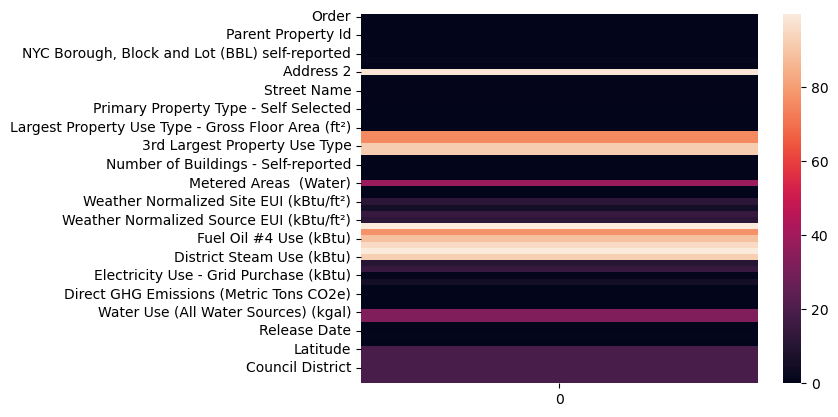

In [16]:
sns.heatmap(pd.DataFrame(per))

# Treating missing values

In [17]:
#droping the columns which has high missing value percentage 
#imputing the columns which has low missing value percentage


In [18]:
def fill_miss_values():
    #imputing "Energy star score" separately to avoid duplicates
    for i in data.drop("ENERGY STAR Score",axis=1):
        if per[i]>25:
            data.drop(i,inplace=True,axis=1)#removing columns greater than threshold(25)
        elif per[i]<25 and data[i].dtypes !="object":
            data[i]=data[i].fillna(data[i].median())#filling missing values with median
        else:
            data[i]=data[i].fillna(data[i].mode()[0])#filling missing object with mode
fill_miss_values()

    

In [19]:
data.isnull().sum()


Order                                                         0
Property Id                                                   0
Property Name                                                 0
Parent Property Id                                            0
Parent Property Name                                          0
BBL - 10 digits                                               0
NYC Borough, Block and Lot (BBL) self-reported                0
NYC Building Identification Number (BIN)                      0
Address 1 (self-reported)                                     0
Postal Code                                                   0
Street Number                                                 0
Street Name                                                   0
Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected                         0
List of All Property Use Types at Proper

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       9642 non-null   int64  
 1   Property Id                                                 9642 non-null   int64  
 2   Property Name                                               9642 non-null   object 
 3   Parent Property Id                                          9642 non-null   object 
 4   Parent Property Name                                        9642 non-null   object 
 5   BBL - 10 digits                                             9642 non-null   object 
 6   NYC Borough, Block and Lot (BBL) self-reported              9642 non-null   object 
 7   NYC Building Identification Number (BIN)                    9642 non-null   object 
 8   Ad

In [21]:
data=data.iloc[:,13:]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 33 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        9642 non-null   float64
 1   Primary Property Type - Self Selected                       9642 non-null   object 
 2   List of All Property Use Types at Property                  9642 non-null   object 
 3   Largest Property Use Type                                   9642 non-null   object 
 4   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 5   Year Built                                                  9642 non-null   int64  
 6   Number of Buildings - Self-reported                         9642 non-null   int64  
 7   Occupancy                                                   9642 non-null   int64  
 8   Me

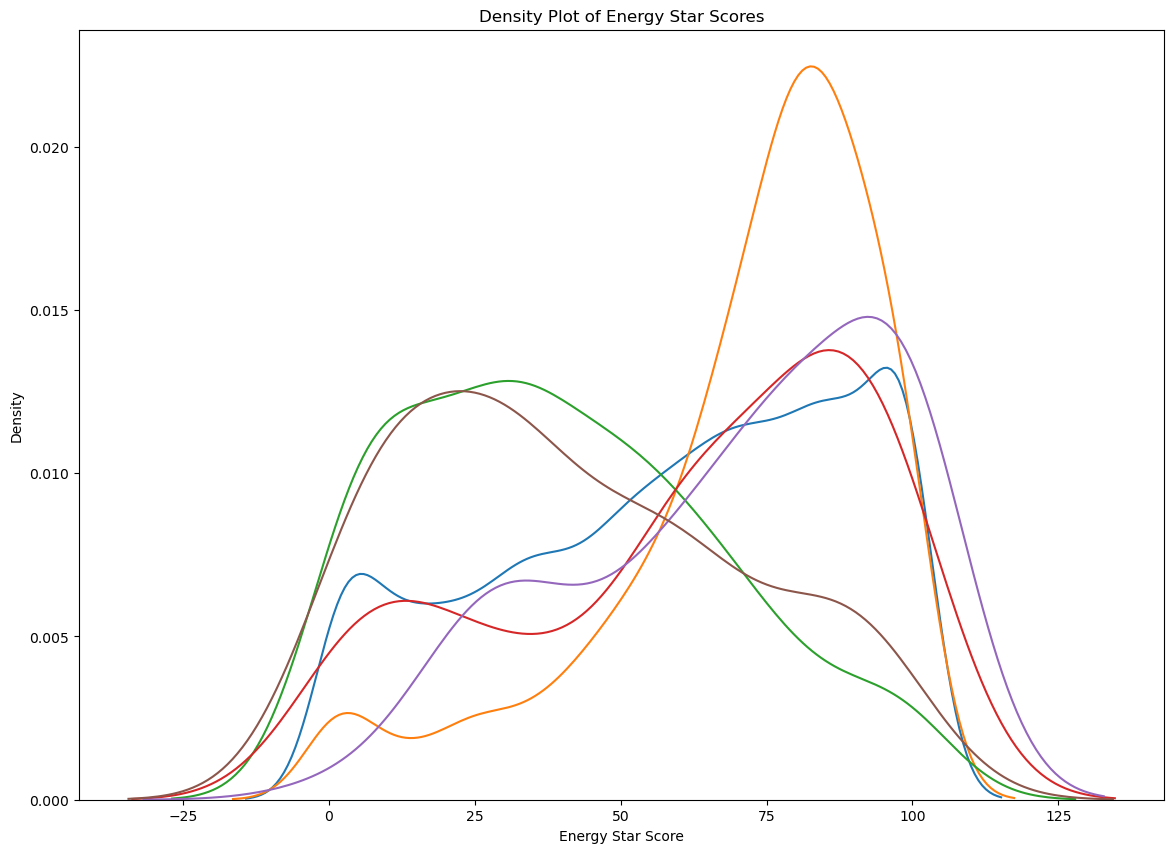

In [23]:
# Create a list of buildings with more than 80 measurements
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 80].index)

plt.figure(figsize=(14, 10))

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Primary Property Type - Self Selected'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               legend = b_type);
    
plt.xlabel('Energy Star Score'); plt.ylabel('Density'); 
plt.title('Density Plot of Energy Star Scores');

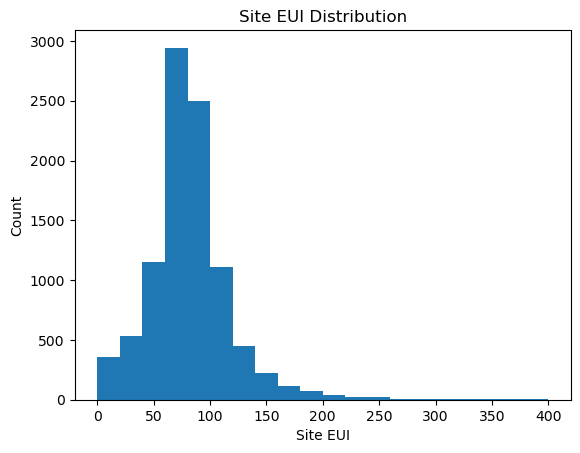

In [24]:
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), range = (0, 400), bins = 20);
plt.xlabel('Site EUI'); plt.ylabel('Count'); plt.title('Site EUI Distribution');

array([[<Axes: title={'center': 'DOF Gross Floor Area'}>,
        <Axes: title={'center': 'Largest Property Use Type - Gross Floor Area (ft²)'}>,
        <Axes: title={'center': 'Year Built'}>],
       [<Axes: title={'center': 'Number of Buildings - Self-reported'}>,
        <Axes: title={'center': 'Occupancy'}>,
        <Axes: title={'center': 'ENERGY STAR Score'}>],
       [<Axes: title={'center': 'Site EUI (kBtu/ft²)'}>,
        <Axes: title={'center': 'Weather Normalized Site EUI (kBtu/ft²)'}>,
        <Axes: title={'center': 'Weather Normalized Site Electricity Intensity (kWh/ft²)'}>],
       [<Axes: title={'center': 'Weather Normalized Site Natural Gas Intensity (therms/ft²)'}>,
        <Axes: title={'center': 'Weather Normalized Source EUI (kBtu/ft²)'}>,
        <Axes: title={'center': 'Natural Gas Use (kBtu)'}>],
       [<Axes: title={'center': 'Weather Normalized Site Natural Gas Use (therms)'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>,
     

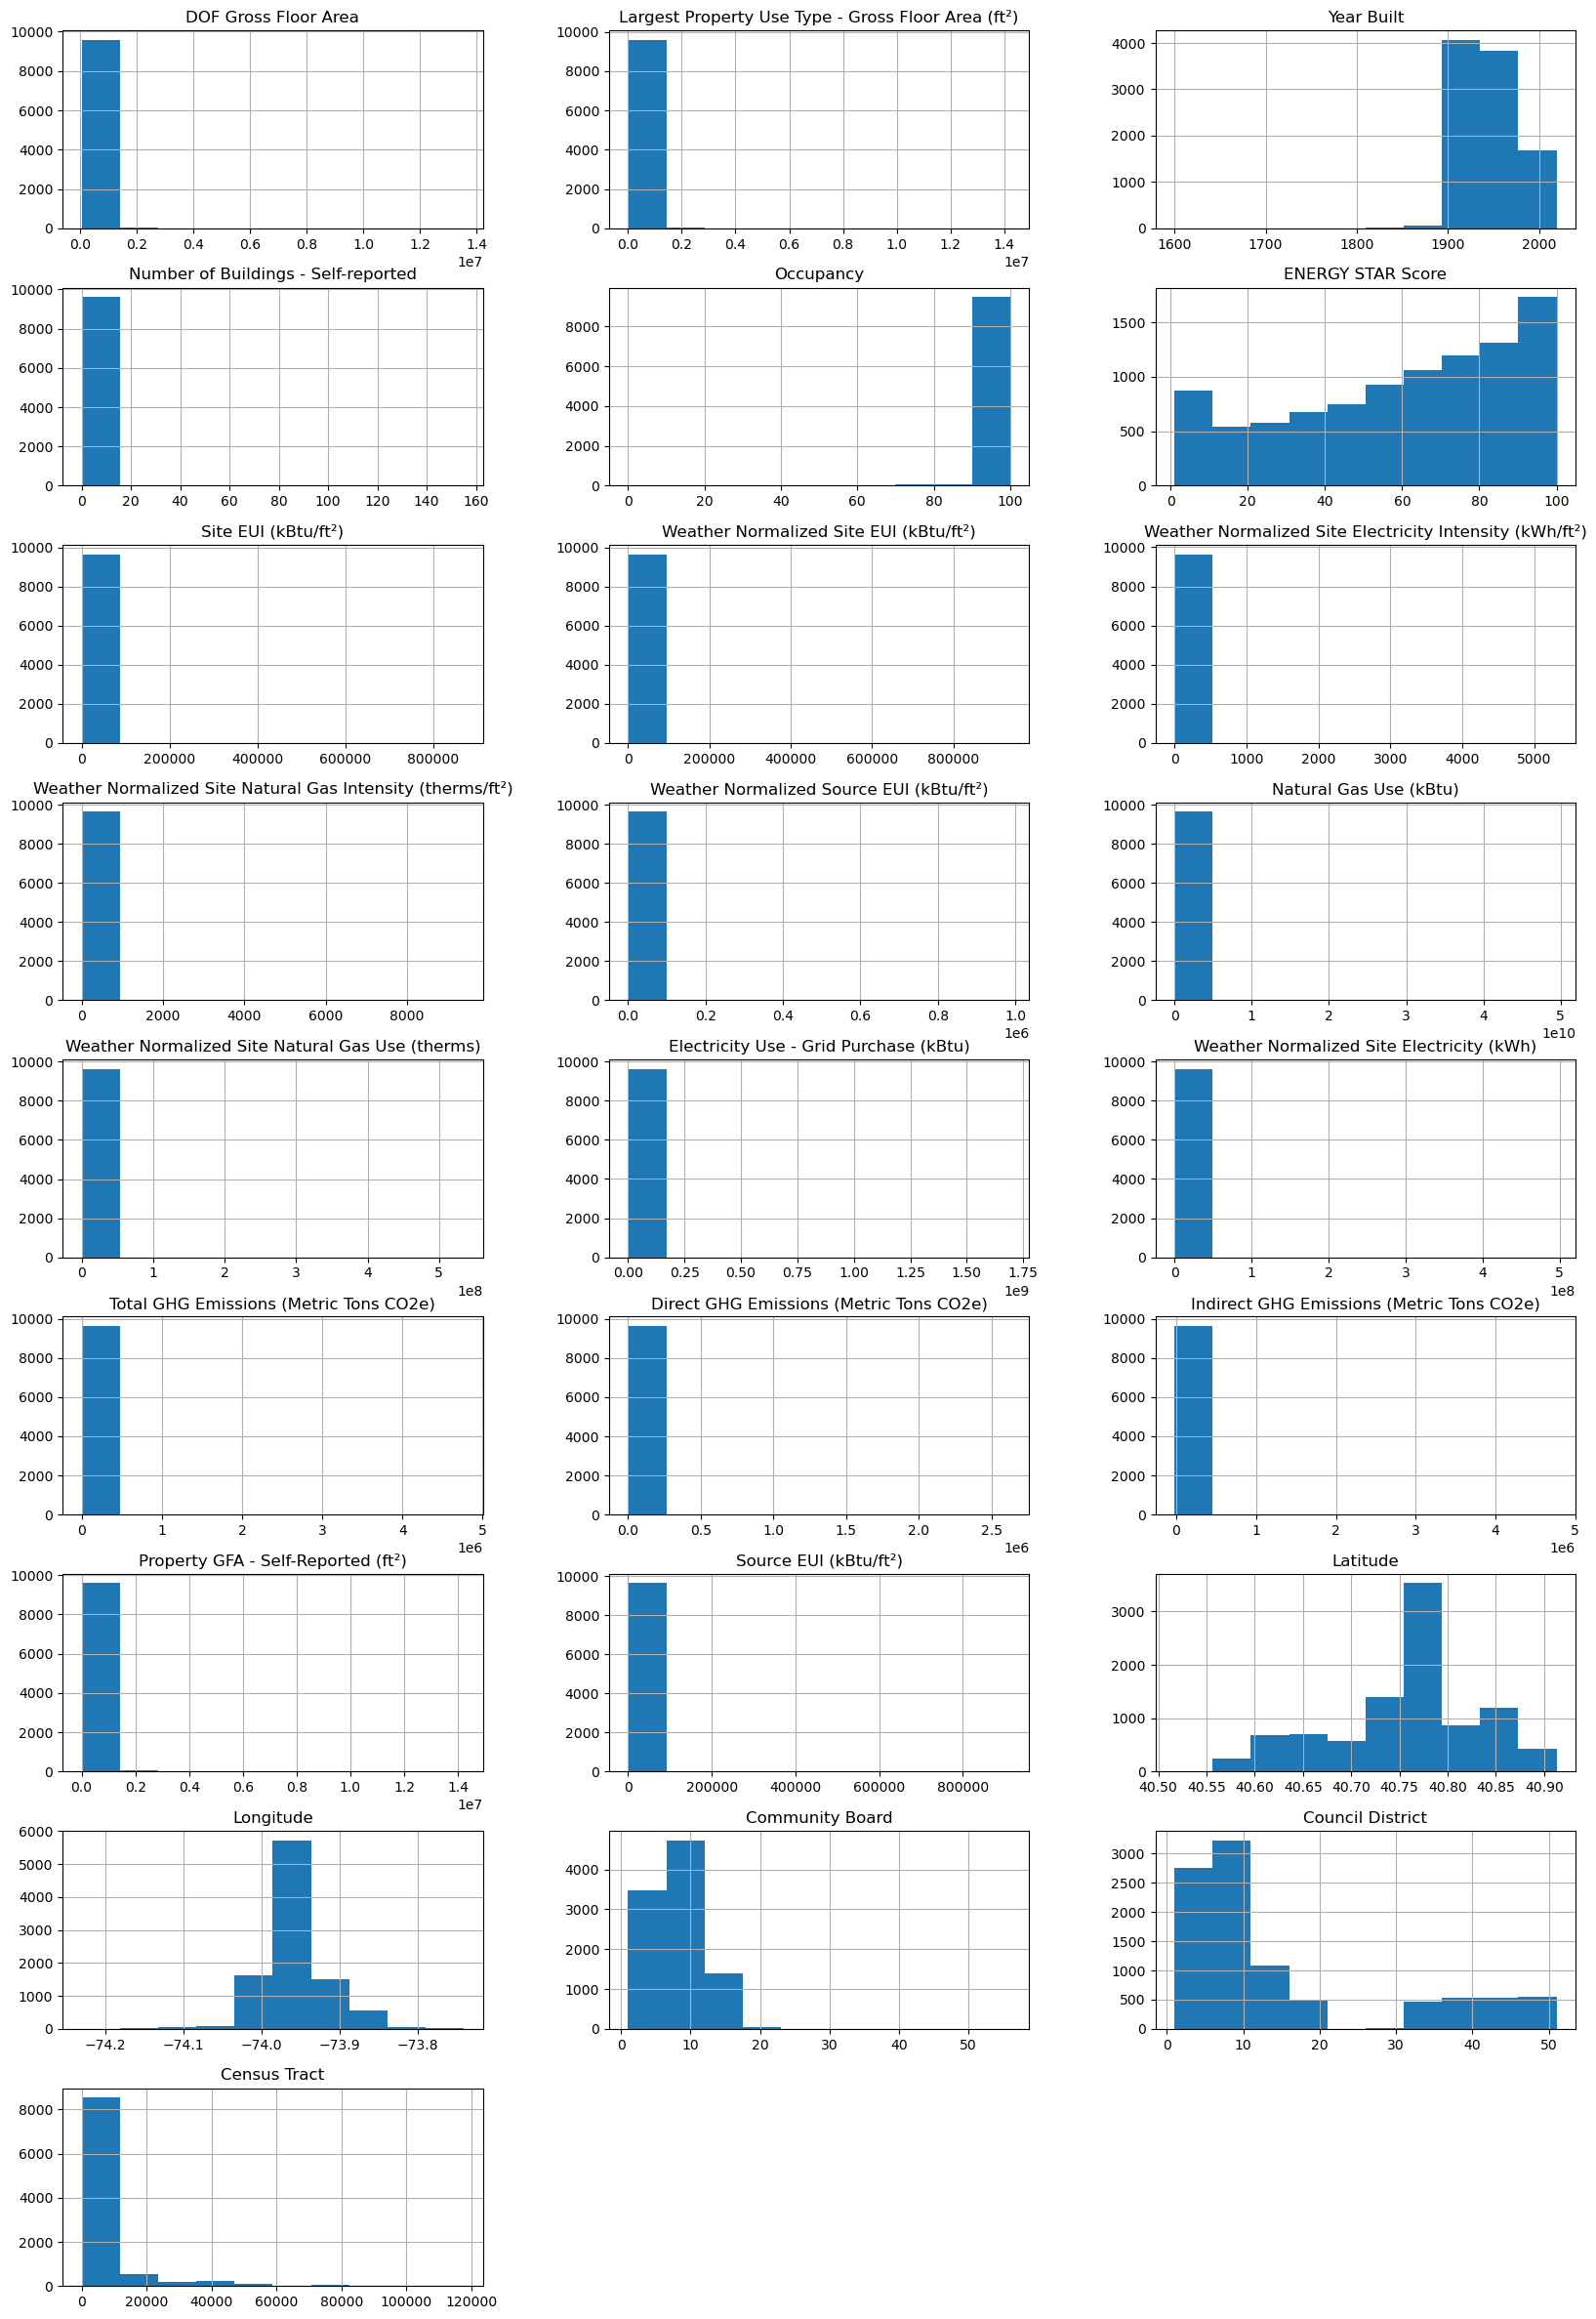

In [25]:
data.hist(figsize=(20,30),layout=(-1,3))

# finding outliers and treating them

In [26]:
# removing unnecessary cols such as  order,property id,bbl 10 digits...
#data=data.iloc[:,3:]
data.drop(columns=["Longitude","Latitude","Council District","Primary Property Type - Self Selected","List of All Property Use Types at Property","Metered Areas (Energy)","Community Board","Number of Buildings - Self-reported","Release Date","Water Required?","DOF Benchmarking Submission Status","Latitude","Longitude","Community Board","Council District","Census Tract","NTA"],inplace=True)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 20 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        9642 non-null   float64
 1   Largest Property Use Type                                   9642 non-null   object 
 2   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 3   Year Built                                                  9642 non-null   int64  
 4   Occupancy                                                   9642 non-null   int64  
 5   ENERGY STAR Score                                           9642 non-null   float64
 6   Site EUI (kBtu/ft²)                                         9642 non-null   float64
 7   Weather Normalized Site EUI (kBtu/ft²)                      9642 non-null   float64
 8   We


# droping duplicates

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
#checking skewness
skew_values=data.select_dtypes(exclude="object").skew()
skew_values

DOF Gross Floor Area                                          17.993052
Largest Property Use Type - Gross Floor Area (ft²)            20.109555
Year Built                                                     0.214704
Occupancy                                                    -11.110929
ENERGY STAR Score                                             -0.451726
Site EUI (kBtu/ft²)                                           92.690416
Weather Normalized Site EUI (kBtu/ft²)                        93.481376
Weather Normalized Site Electricity Intensity (kWh/ft²)       48.780785
Weather Normalized Site Natural Gas Intensity (therms/ft²)    98.161466
Weather Normalized Source EUI (kBtu/ft²)                      91.032992
Natural Gas Use (kBtu)                                        97.803206
Weather Normalized Site Natural Gas Use (therms)              97.857460
Electricity Use - Grid Purchase (kBtu)                        39.186980
Weather Normalized Site Electricity (kWh)                     39

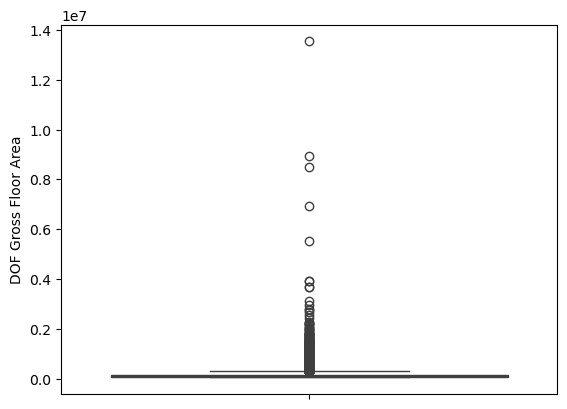

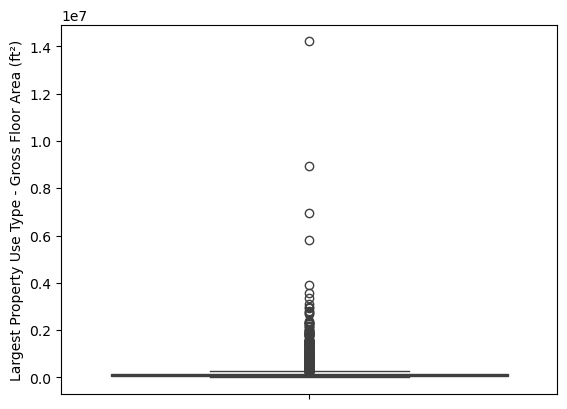

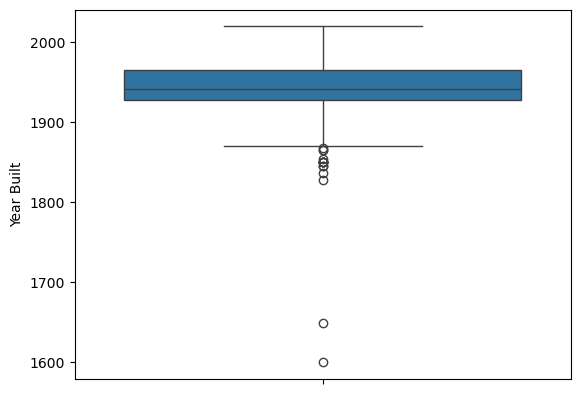

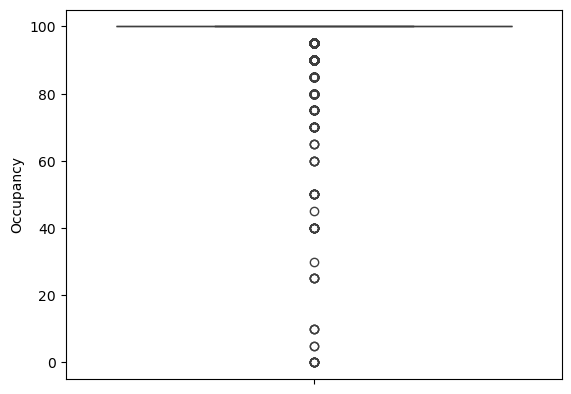

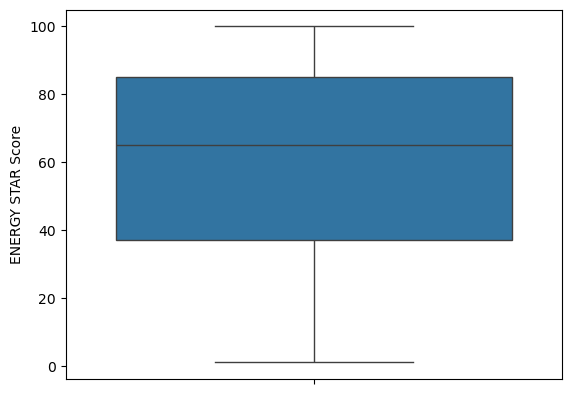

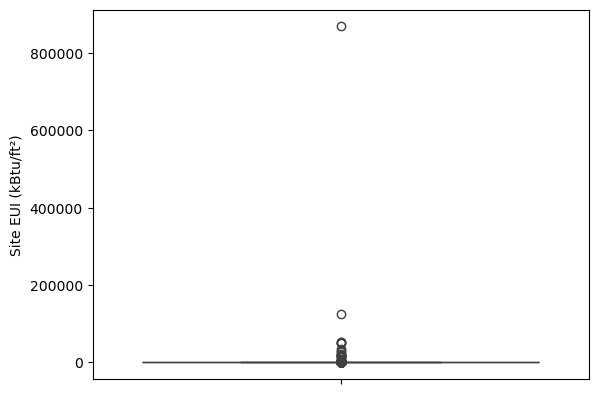

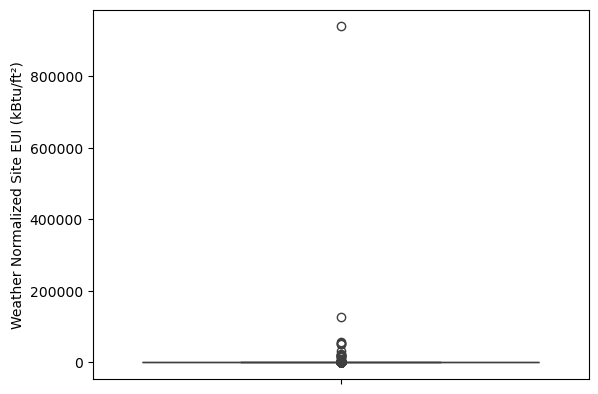

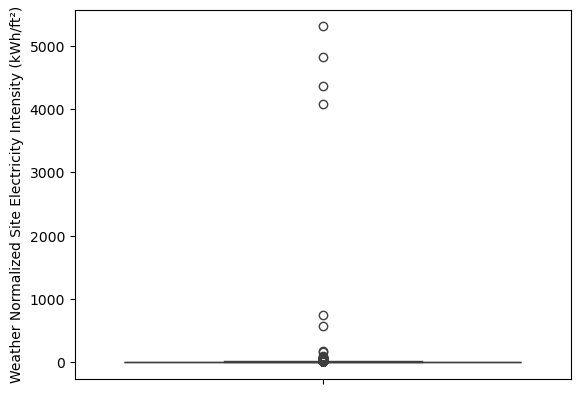

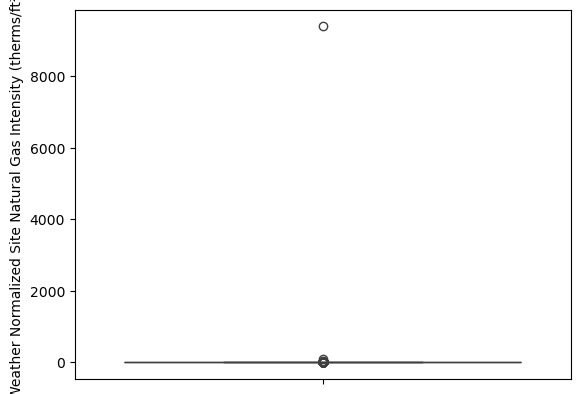

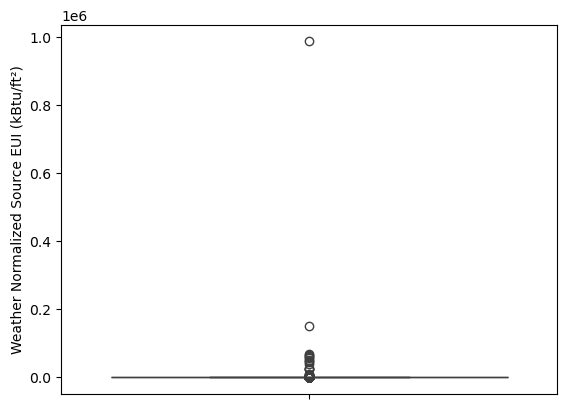

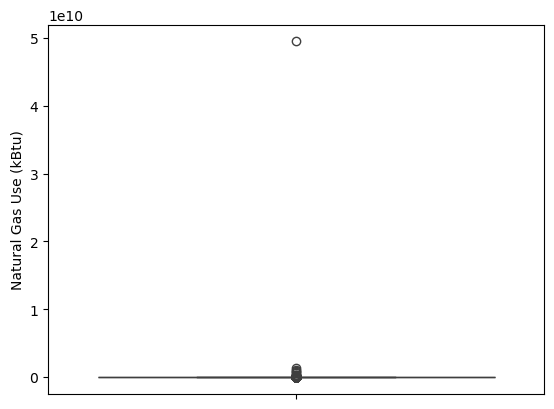

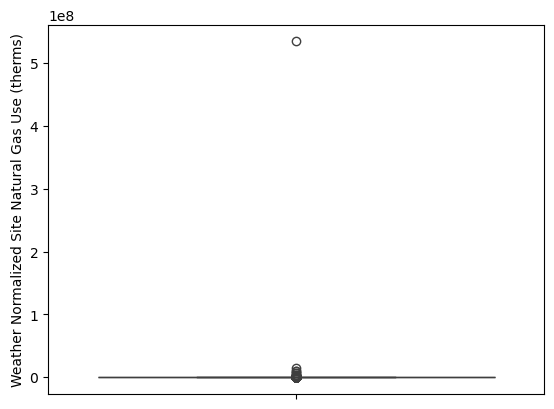

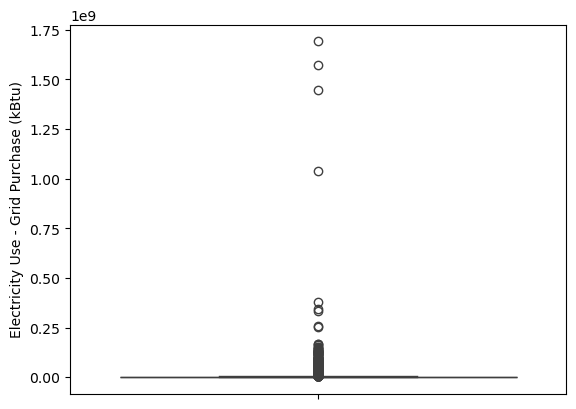

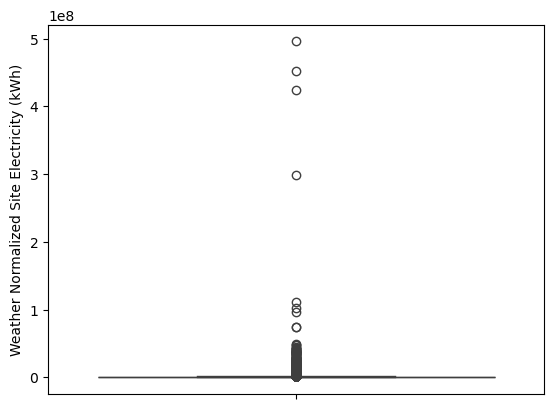

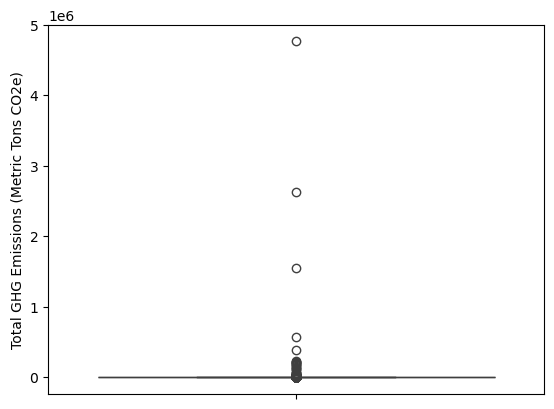

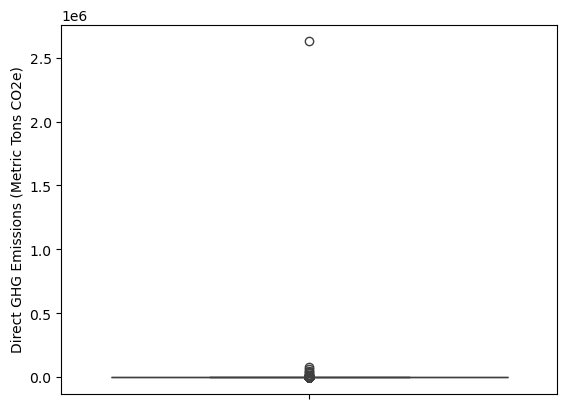

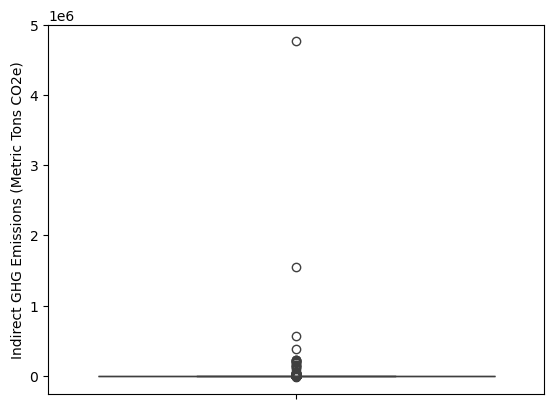

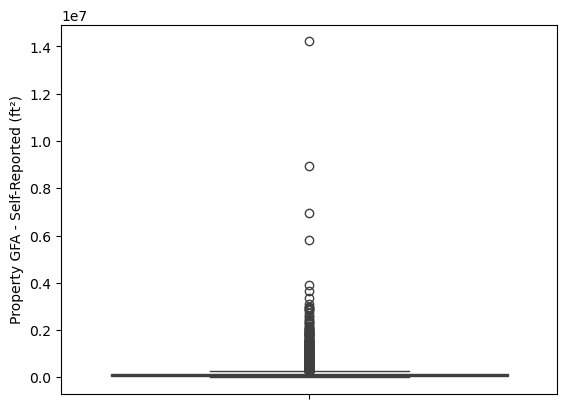

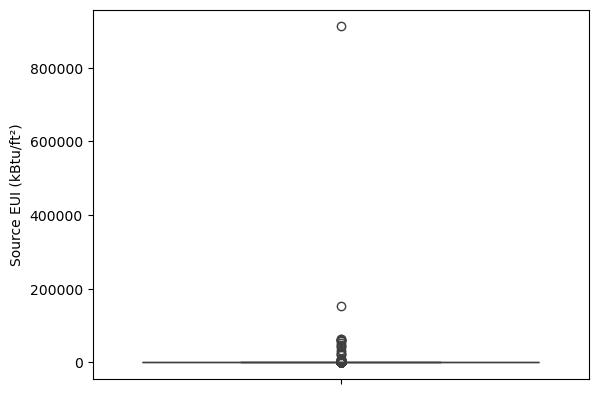

In [30]:
# this function helps us to find outliers in every col
def box_plot(col):
    sns.boxplot(data[col])

    plt.show()
    
for i in data.select_dtypes(exclude="object"):
    box_plot(i)

#Not treating Outliers
"""from statistics import quantiles
from scipy.stats import iqr
def handling_outliers():
    for i in data.select_dtypes(exclude="object").drop(columns=["ENERGY STAR Score"]):
        spread=quantiles(data[i],n=4)
        IQR=iqr(data[i])
        lower=spread[0]-1.5*IQR
        upper=spread[2]+1.5*IQR
        data[i]=np.clip(data[i],lower,upper)
handling_outliers()"""
        

In [31]:
# this function helps us to find outliers in every col
"""def box_plot(col):
    sns.boxplot(data[col])

    plt.show()
    
for i in data.select_dtypes(exclude="object"):
    box_plot(i)"""

'def box_plot(col):\n    sns.boxplot(data[col])\n\n    plt.show()\n    \nfor i in data.select_dtypes(exclude="object"):\n    box_plot(i)'

-0.4517263421997431

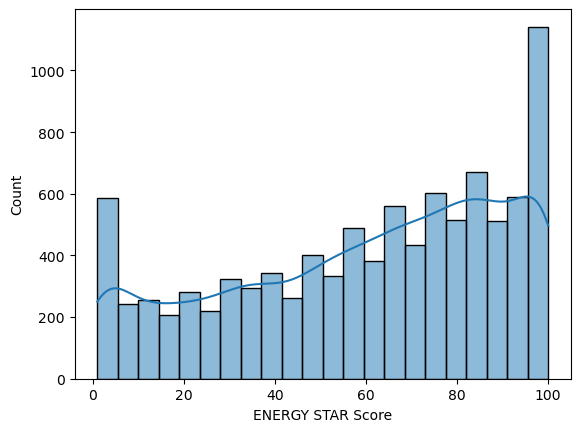

In [32]:
#visualizing energy star score
sns.histplot(data["ENERGY STAR Score"],kde=True)
#checking skewness
data["ENERGY STAR Score"].skew()


above fig shows the moderately normaly distributed

In [33]:
s=data.select_dtypes(exclude="object").corr(method="spearman")

<Axes: >

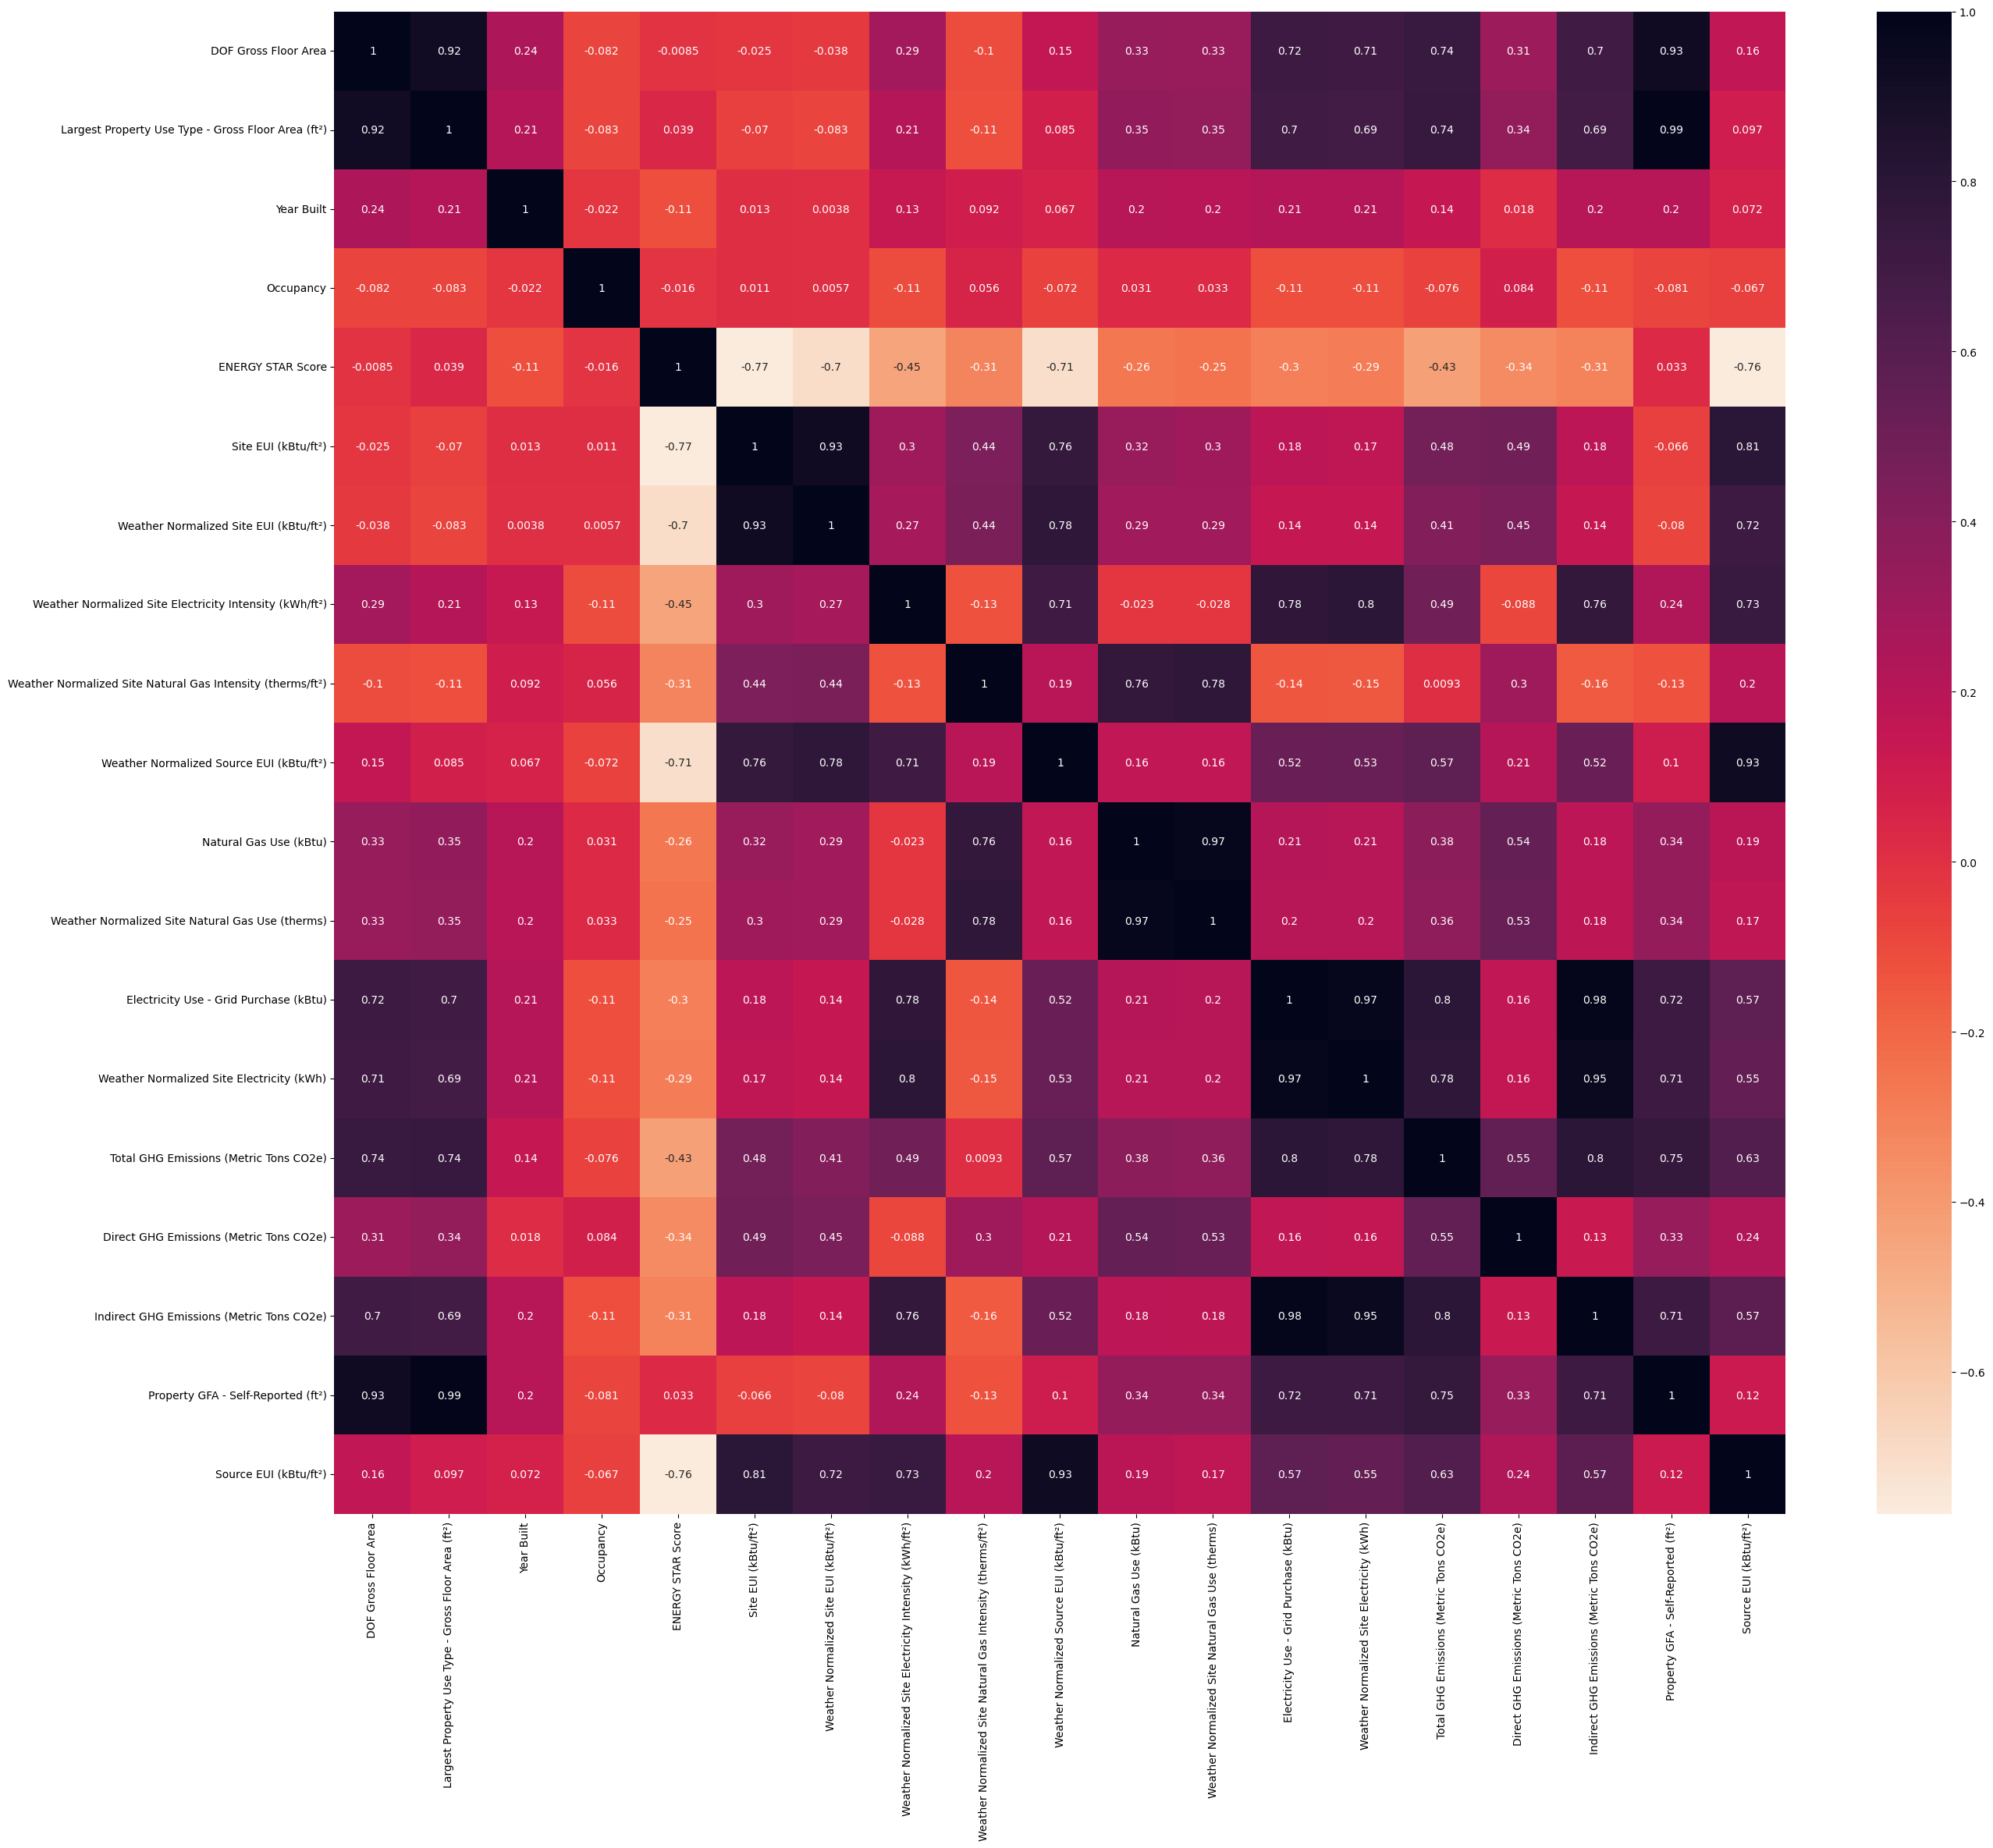

In [34]:
#visualising correaltion using heatmap
plt.figure(figsize=(30,25))
sns.heatmap(s,annot=True,cmap="rocket_r")

# one hot encoding

In [35]:
data["Largest Property Use Type"]=data["Largest Property Use Type"].astype("category")
data["Largest Property Use Type"]=data["Largest Property Use Type"].cat.codes


# Feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in data:
    if i in columns:
        data[i]=scaler.fit_transform(data[[i]])        


# spliting the target and indpendent variable

<Axes: >

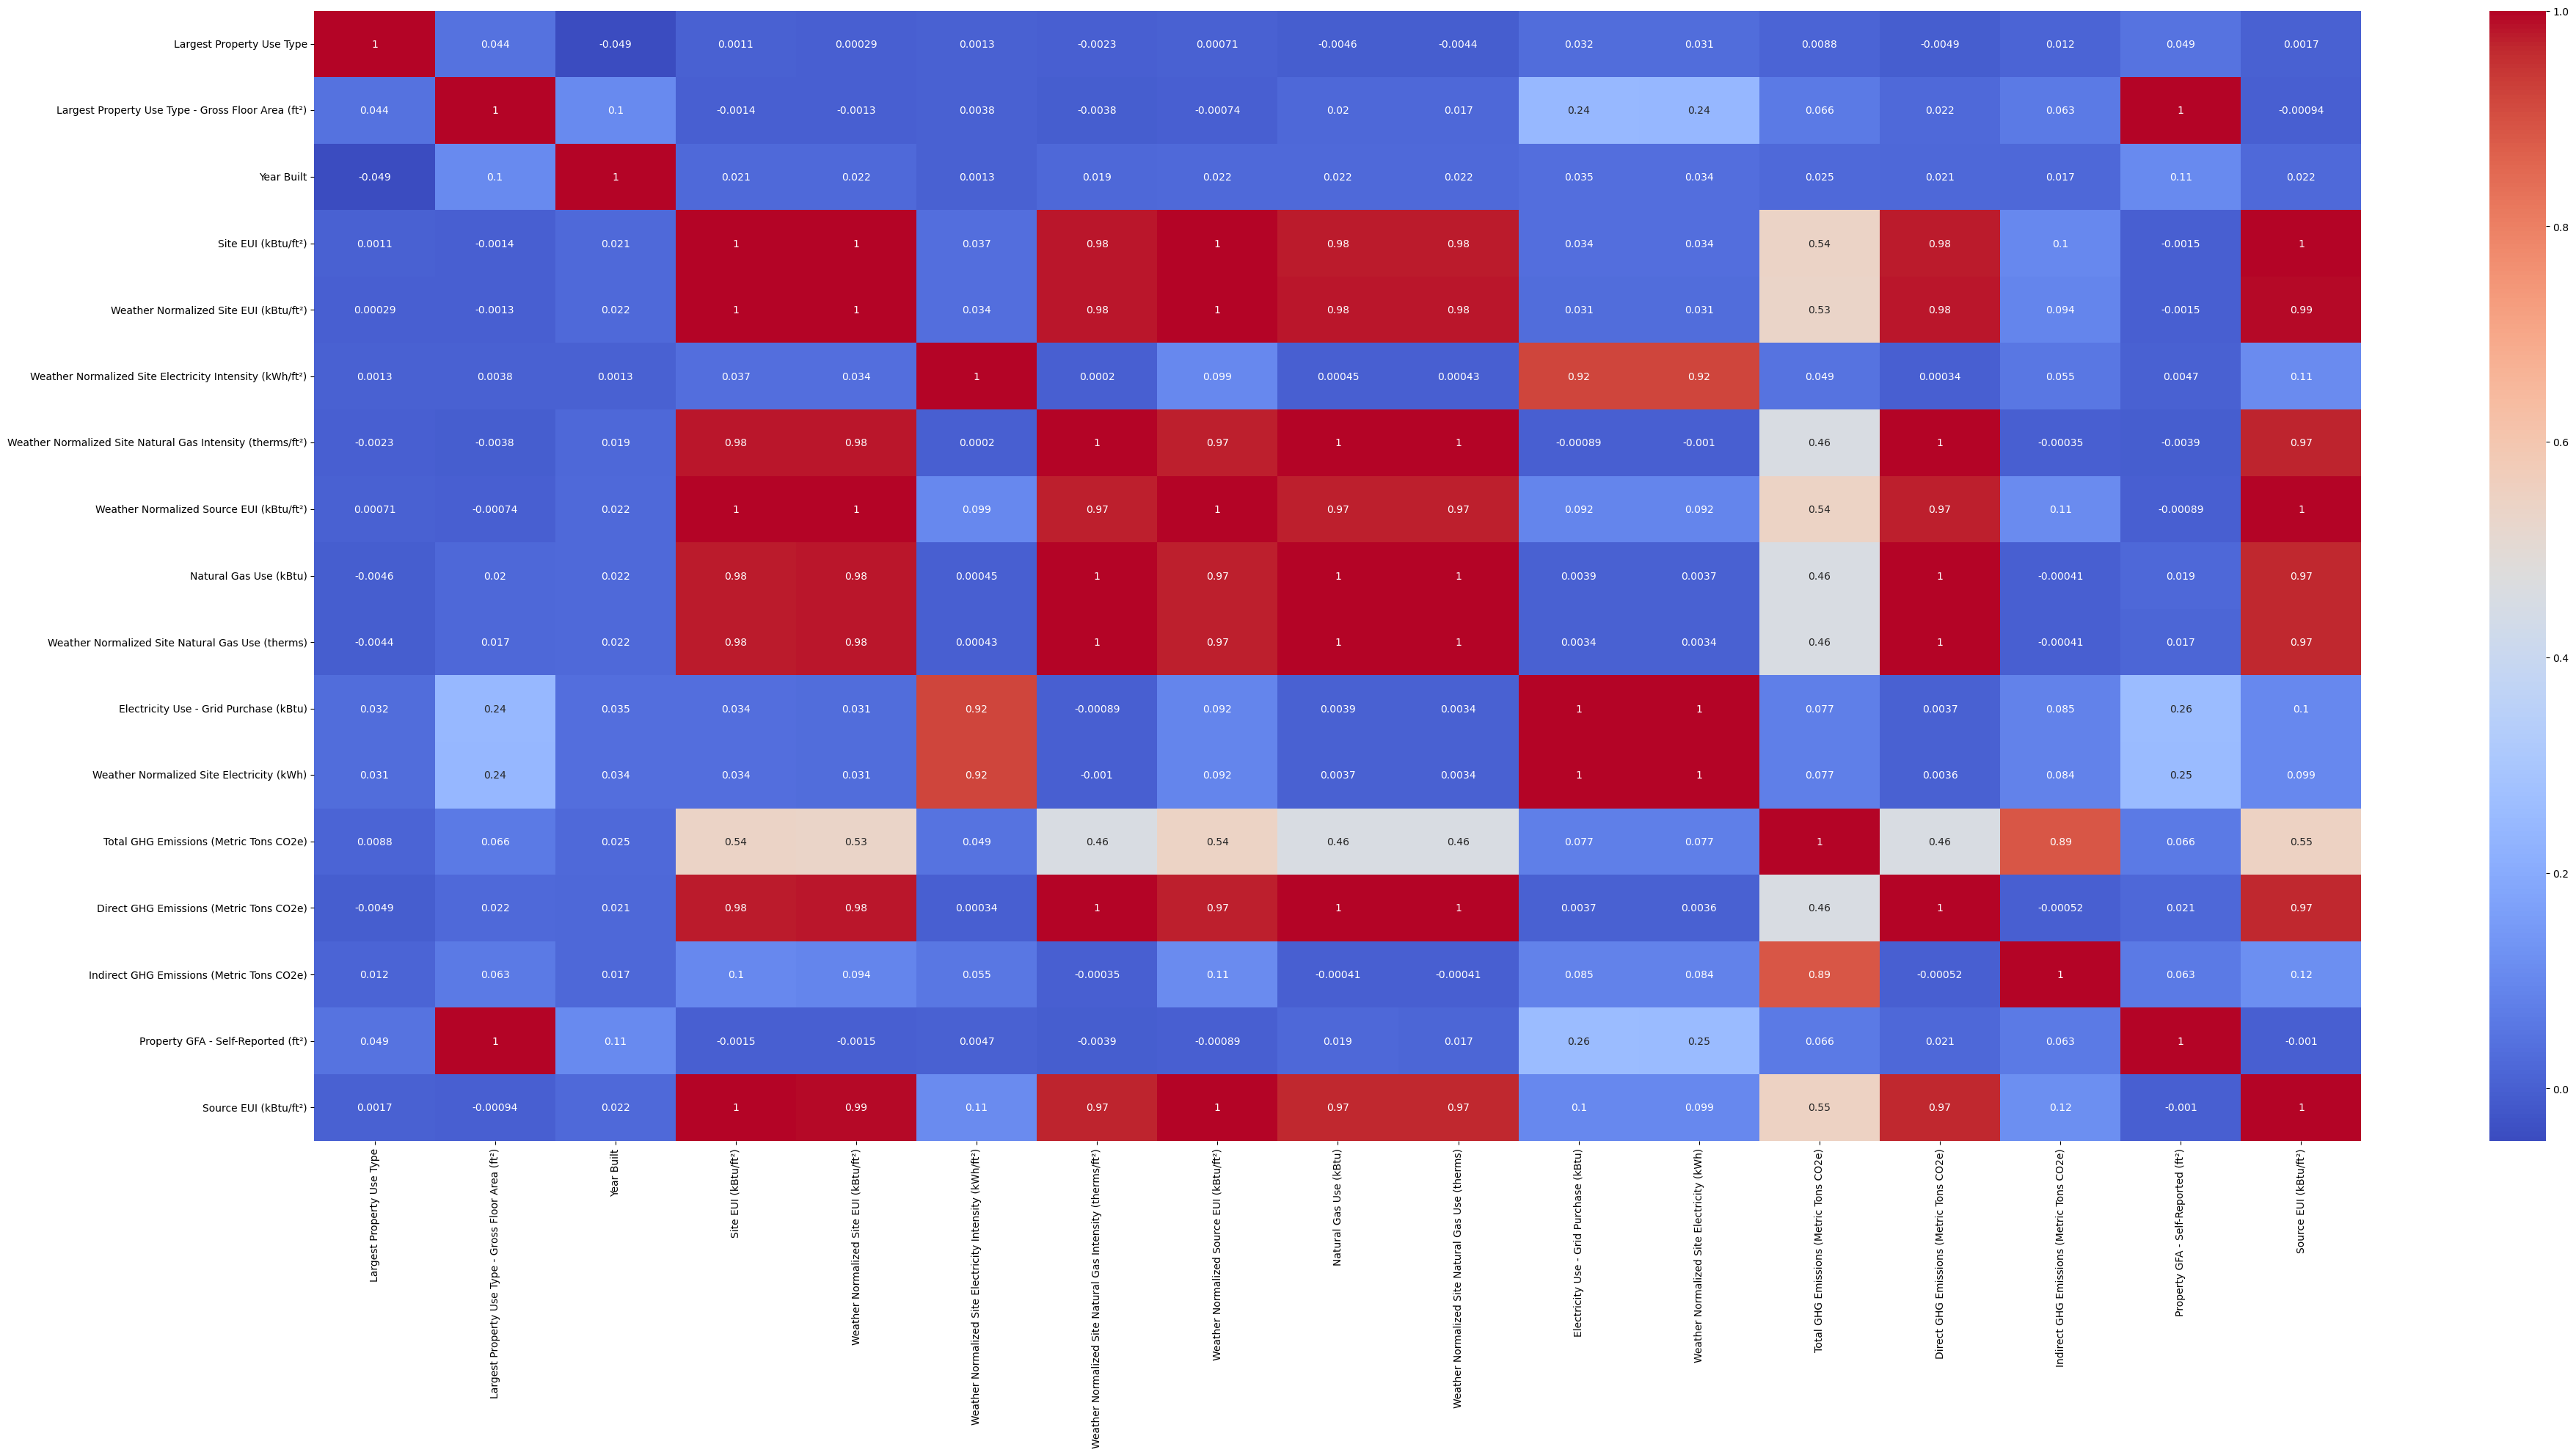

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X=data.drop(columns=["ENERGY STAR Score","Occupancy","DOF Gross Floor Area"])#independent features
y=data["ENERGY STAR Score"]

plt.figure(figsize=(45,20))
sns.heatmap(X.iloc[:,:17].corr(),annot=True,cmap="coolwarm")#checking correlation with independent features


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 1 to 11745
Data columns (total 17 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Largest Property Use Type                                   9639 non-null   int8   
 1   Largest Property Use Type - Gross Floor Area (ft²)          9639 non-null   float64
 2   Year Built                                                  9639 non-null   int64  
 3   Site EUI (kBtu/ft²)                                         9639 non-null   float64
 4   Weather Normalized Site EUI (kBtu/ft²)                      9639 non-null   float64
 5   Weather Normalized Site Electricity Intensity (kWh/ft²)     9639 non-null   float64
 6   Weather Normalized Site Natural Gas Intensity (therms/ft²)  9639 non-null   float64
 7   Weather Normalized Source EUI (kBtu/ft²)                    9639 non-null   float64
 8   Na

# Train_test split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
X_train.shape

(6747, 17)

In [41]:
X_test.shape

(2892, 17)

In [42]:
y_train.shape,y_test.shape

((6747,), (2892,))

# Developing The Model

#### Iam using Top 5 ML Models for this project
1. Decision Tree Regressor
2. Random Forest Regressor
3. Xgboost
4. GradientBoostingRegressor
5. Bagging(This not a model but if thier is high varaince from above models, I will use this ensembel method)

In [43]:
Model_names="DTree BaggingRegressor(Dtree) forest Xgboost BaggingRegressor(Xgboost) GradientBoostingRegressor".split()
Model_performance_Df=pd.DataFrame(Model_names,columns=["Models"])
Model_train_score=[]#storing all model train score
Model_test_score=[]##storing all model test score



# DecisionTree Regresor

In [44]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
y_pred=tree.predict(X_test)
train_preds=tree.predict(X_train)

### Measuring the performance

In [46]:
from sklearn import metrics
tree_test_r2_score=metrics.r2_score(y_test,y_pred)


In [47]:
tree_train_r2score=metrics.r2_score(y_train,train_preds)

In [48]:

tree_train_r2score,tree_test_r2_score # comaparing score for seen and unseen data

(0.9999601196165626, 0.6277972519128318)

In [49]:
Model_train_score.append(tree_train_r2score)
Model_test_score.append(tree_test_r2_score)

In [50]:
tree.feature_importances_

array([0.14668724, 0.01212956, 0.0197599 , 0.02539099, 0.01081503,
       0.0127261 , 0.00463732, 0.02013576, 0.00844153, 0.00971532,
       0.00458153, 0.00843872, 0.01134066, 0.01356855, 0.00668147,
       0.00810628, 0.67684404])

#### as we observer their is high variance so I am going to using bagging

In [51]:
from sklearn.ensemble import BaggingRegressor
# Default bagging will follow Decision Tree
bagging_regressor1=BaggingRegressor(n_estimators=200,oob_score=True)
bagging_regressor1.fit(X_train,y_train)

BaggingRegressor(n_estimators=200, oob_score=True)

In [52]:
y_train_baging_preds=bagging_regressor1.predict(X_train)
y_test_bagging_preds=bagging_regressor1.predict(X_test)


# Measuring Performance

In [53]:
bagging_train_r2score=metrics.r2_score(y_train,y_train_baging_preds)
bagging_test_r2score=metrics.r2_score(y_test,y_test_bagging_preds)
bagging_test_r2score,bagging_train_r2score


(0.7996693646706016, 0.9732999176741658)

In [54]:
Model_train_score.append(bagging_train_r2score)
Model_test_score.append(bagging_test_r2score)

# RandomForestRegrssor

In [55]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=200,oob_score=True)

In [56]:
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [57]:
test_pred=forest.predict(X_test)

In [58]:
#Model performance Measure
forest_r2_score_train,forest_r2_score_test=metrics.r2_score(y_train,forest.predict(X_train)),metrics.r2_score(y_test,test_pred)

In [59]:
forest_r2_score_train,forest_r2_score_test

(0.9734325777360863, 0.7972823427004396)

In [60]:
Model_train_score.append(forest_r2_score_train)
Model_test_score.append(forest_r2_score_test)

# Feature Importance Bar Graph

Text(0.5, 0, 'Random Forest Feature Importance')

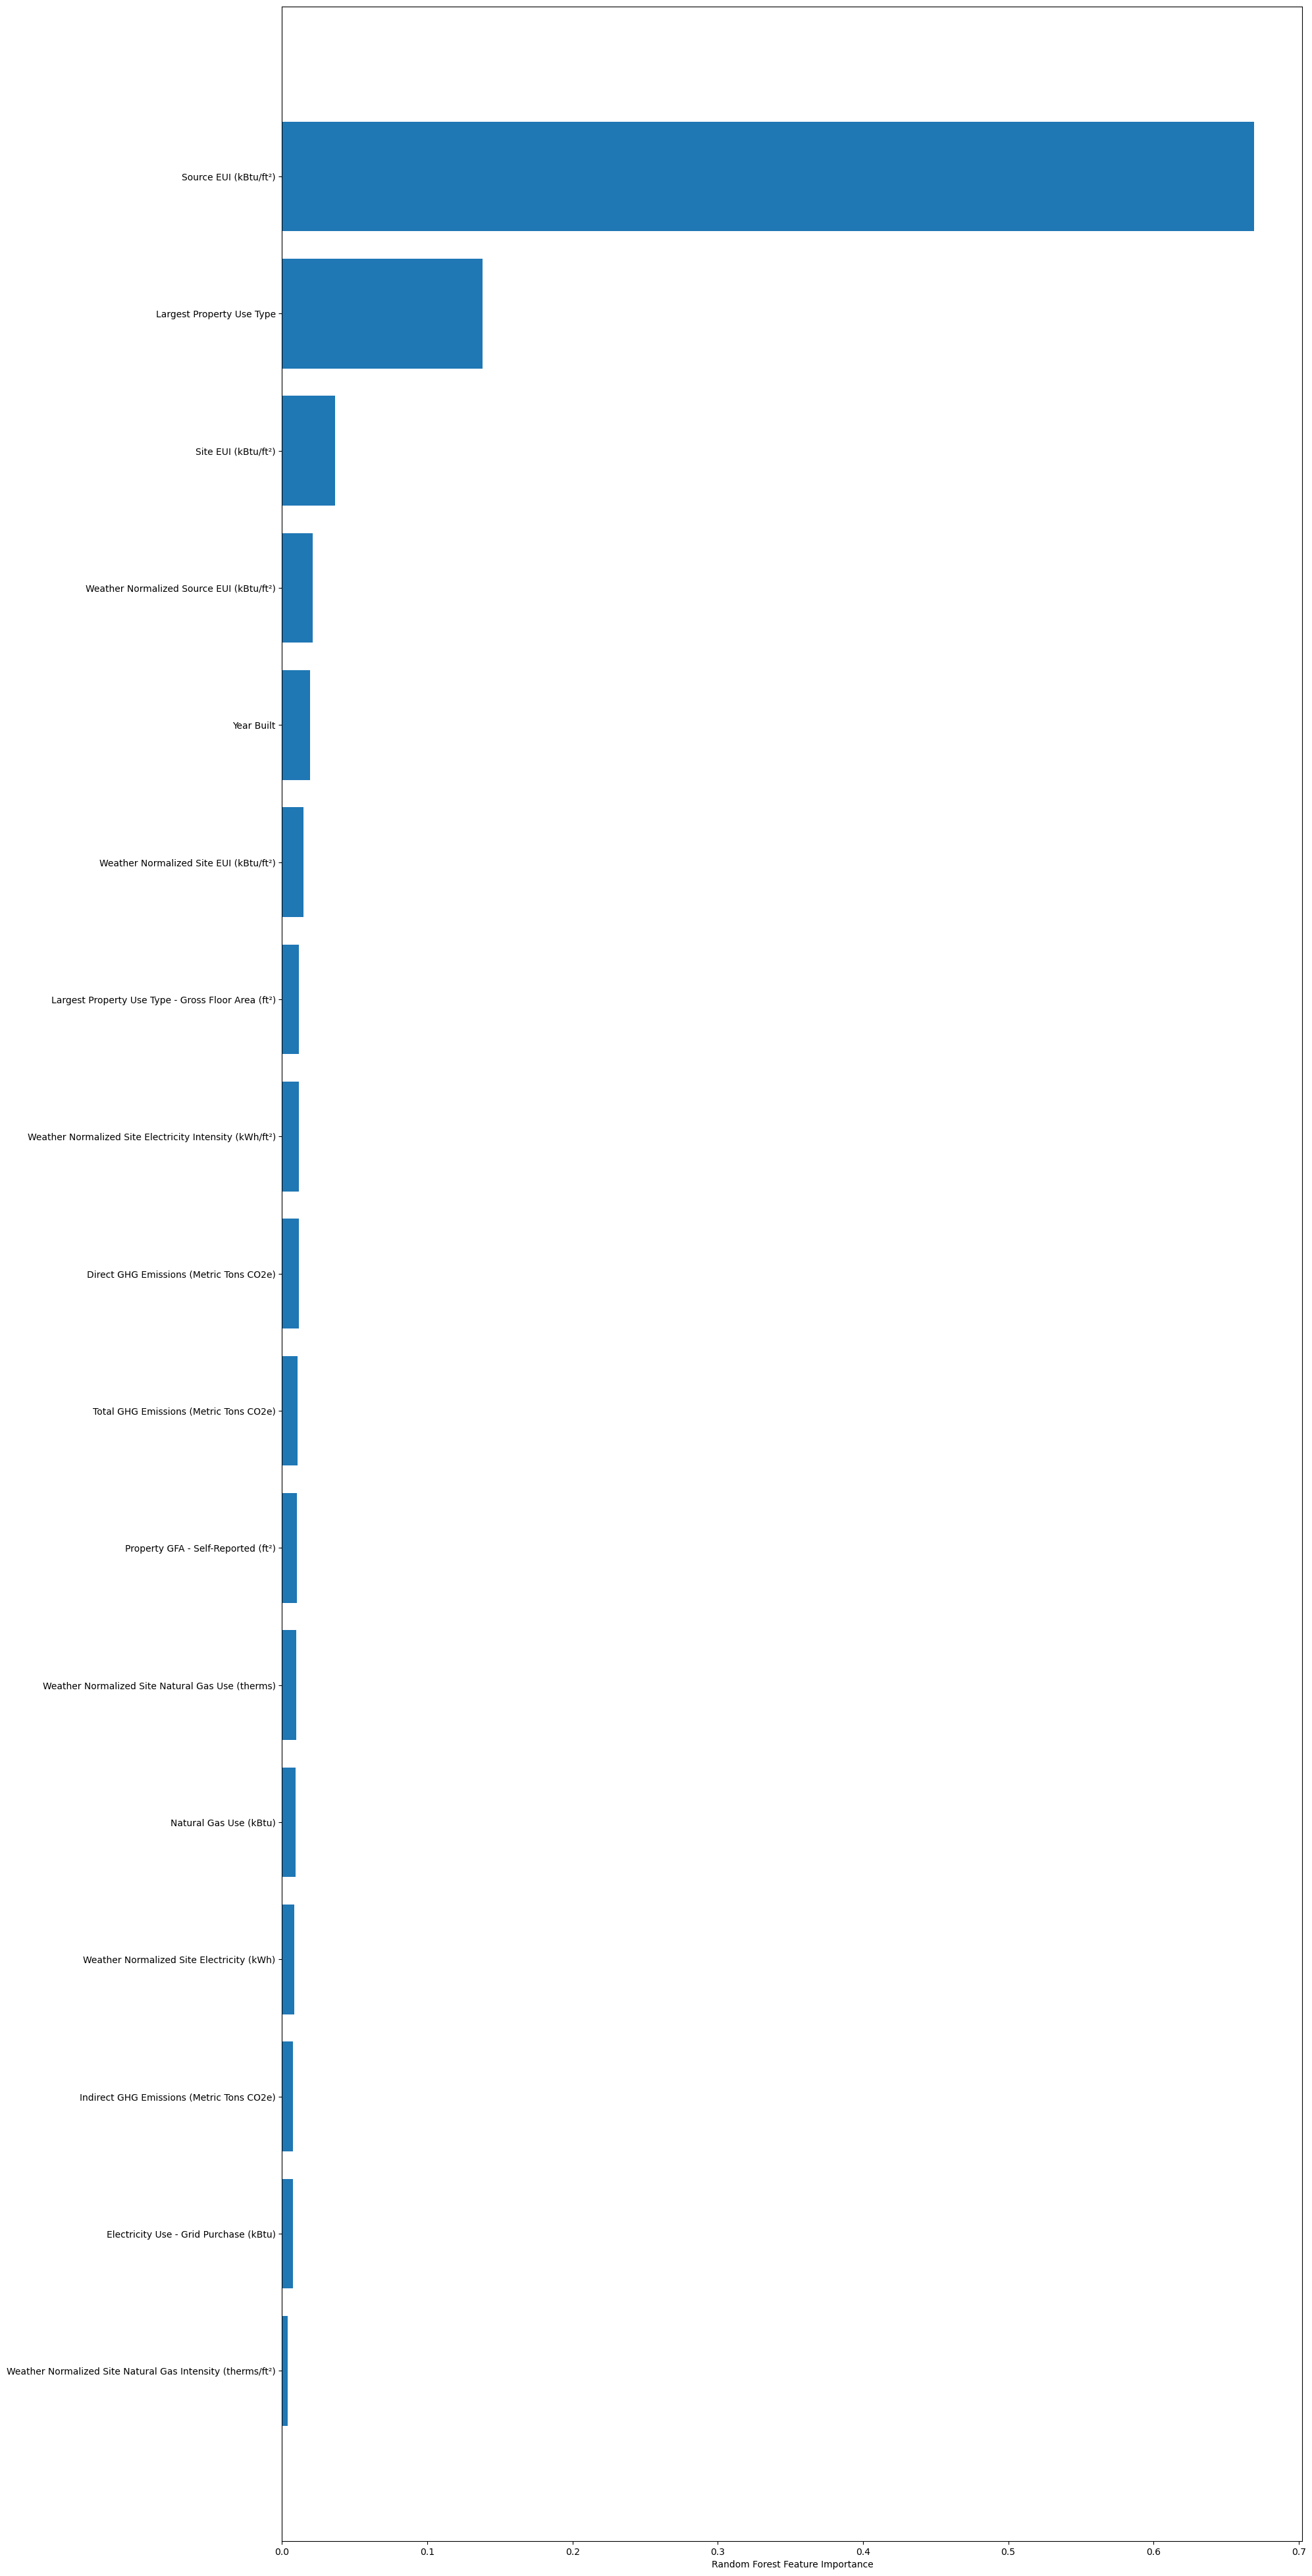

In [61]:
sorted_idx = forest.feature_importances_.argsort()
plt.figure(figsize=(20,50))
plt.barh(X_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# XGBoost

In [62]:
from xgboost import XGBRegressor
boost=XGBRegressor(n_estimators=100)
boost.fit(X_train,y_train)
test=boost.predict(X_test)
train=boost.predict(X_train)
boost_r2_score_test,boost_r2_score_train=metrics.r2_score(y_test,test),metrics.r2_score(y_train,train)

In [63]:
boost_r2_score_test,boost_r2_score_train


(0.7884578746338121, 0.9587902171834813)

In [64]:
Model_train_score.append(boost_r2_score_train)
Model_test_score.append(boost_r2_score_test)

#### As we observe thier is high vairance. so, I am going to use bagging 

# Bagging XGboost

In [65]:
bagging_boost=BaggingRegressor(base_estimator=boost,n_estimators=100,oob_score=True)
bagging_boost.fit(X_train,y_train)
test=bagging_boost.predict(X_test)
train=bagging_boost.predict(X_train)

# Performance Measure

In [66]:
bagging_Xgboost_test,bagging_Xgboost_train=metrics.r2_score(y_test,test),metrics.r2_score(y_train,train)
bagging_Xgboost_test,bagging_Xgboost_train

(0.8100034637462835, 0.9432916866100199)

In [67]:
Model_train_score.append(bagging_Xgboost_train)
Model_test_score.append(bagging_Xgboost_test)

# GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [69]:
test=gradient.predict(X_test)

In [70]:
train=gradient.predict(X_train)

# Performance Measure

In [71]:
gradient_r2_score_test,gradient_r2_score_train=metrics.r2_score(y_test,test),metrics.r2_score(y_train,train)

In [72]:
gradient_r2_score_test,gradient_r2_score_train

(0.8040797529020225, 0.8412852308497037)

In [73]:
Model_train_score.append(gradient_r2_score_train)
Model_test_score.append(gradient_r2_score_test)

In [74]:
Model_performance_Df["test_score"]=Model_test_score
Model_performance_Df["train_score"]=Model_train_score


# Model Performace Graph

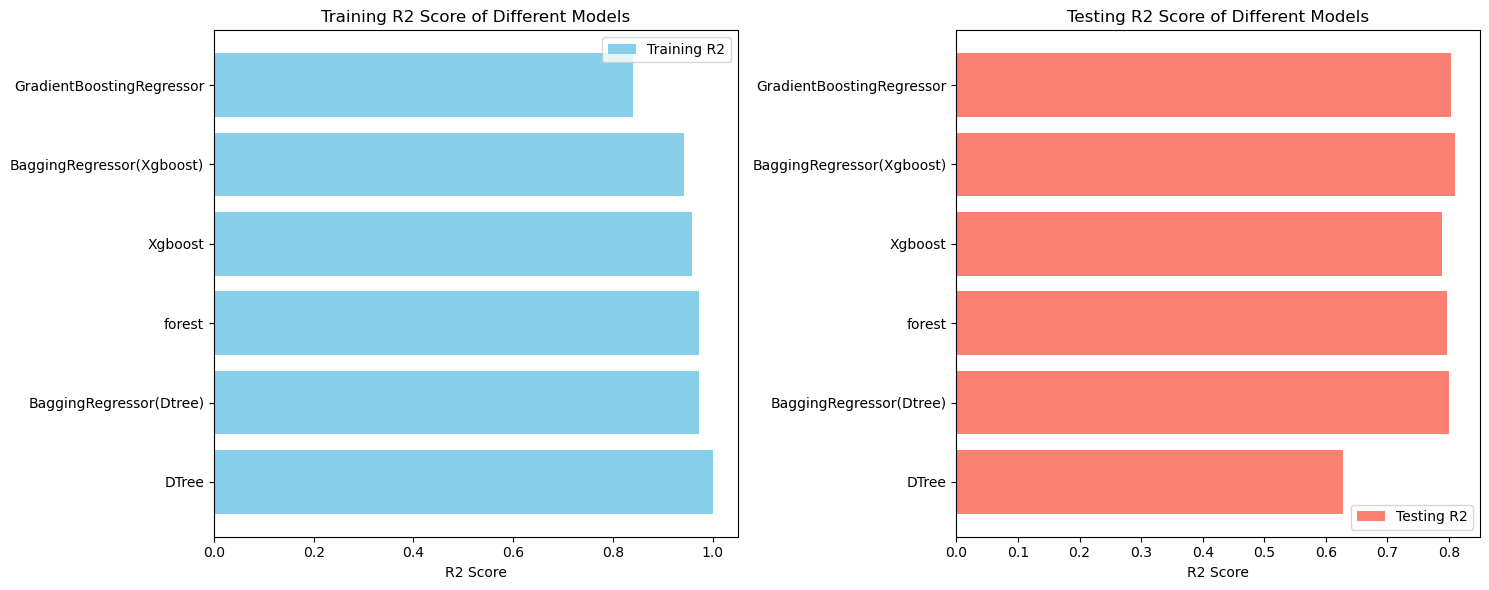

In [75]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plotting training R2 scores
axes[0].barh(Model_performance_Df["Models"],Model_performance_Df["train_score"], color='skyblue', label='Training R2')
axes[0].set_xlabel('R2 Score')
axes[0].set_title('Training R2 Score of Different Models')

# Plotting testing R2 scores
axes[1].barh(Model_performance_Df["Models"],Model_performance_Df["test_score"], color='salmon', label='Testing R2')
axes[1].set_xlabel('R2 Score')
axes[1].set_title('Testing R2 Score of Different Models')

# Add legends
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()


# Conclusion

The GradientBoostingRegressor working well for training and test as we observer the above graph